In [43]:
import pandas as pd
data = pd.read_csv("test_data_full.csv",header=0,index_col=False)

In [29]:
data.head()

,region,price,price_per_size,size,rooms,rent
0,Viggbyholm,1600000,59259,27.0,1.0,2171
1,Ektorp,1550000,77500,20.0,1.0,983
2,Årsta,2200000,73333,30.0,1.0,2455
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945


In [30]:
data.rename({'price':'label'}, axis=1, inplace=True)

In [31]:
data.head()

,region,label,price_per_size,size,rooms,rent
0,Viggbyholm,1600000,59259,27.0,1.0,2171
1,Ektorp,1550000,77500,20.0,1.0,983
2,Årsta,2200000,73333,30.0,1.0,2455
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945


In [3]:
import nltk

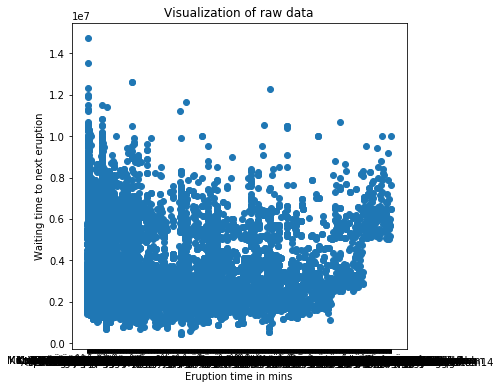

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [32]:
X = data.iloc[:, :-1].values
X

array([['Viggbyholm', 1600000, 59259, 27.0, 1.0],
       ['Ektorp', 1550000, 77500, 20.0, 1.0],
       ['Årsta', 2200000, 73333, 30.0, 1.0],
       ...,
       ['Södermalm', 6905000, 94589, 73.0, 2.5],
       ['Östermalm', 6150000, 106034, 58.0, 2.0],
       ['Vasastan', 6200000, 93939, 66.0, 3.0]], dtype=object)

In [37]:
## One-hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [35]:
enc.categories_[0]

array(['Abrahamsberg', 'Abrahamsberg / Åkeslund', 'Akalla', ...,
       'Östertälje', 'Östra Orminge', 'Övre Gärdet'], dtype=object)

In [38]:
enc_df = pd.DataFrame(enc.fit_transform(data[['region']]).toarray())

In [40]:
enc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
data = data.join(enc_df)

In [42]:
data.head()

,region,label,price_per_size,size,rooms,rent,0,1,2,3,...,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316
0,Viggbyholm,1600000,59259,27.0,1.0,2171,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ektorp,1550000,77500,20.0,1.0,983,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Årsta,2200000,73333,30.0,1.0,2455,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
regions = pd.DataFrame(data, columns=['region'])

In [45]:
regions

,region
0,Viggbyholm
1,Ektorp
2,Årsta
3,Midsommarkransen/Telefonplan
4,Bromma / Mariehäll
...,...
19164,Vasastan
19165,Södermalm/Högalid
19166,Södermalm
19167,Östermalm


In [48]:
dum_df = pd.get_dummies(regions, columns=["region"])

In [49]:
dum_df

,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,region_Alby,region_Alby - Norsborg,region_Alphyddan,region_Annedal,region_Apoteksskogen,region_Apudden,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data_one_hpt = data.join(dum_df)

In [51]:
data_one_hpt

,region,price,price_per_size,size,rooms,rent,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
0,Viggbyholm,1600000,59259,27.0,1.0,2171,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ektorp,1550000,77500,20.0,1.0,983,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Årsta,2200000,73333,30.0,1.0,2455,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19164,Vasastan,5600000,86154,65.0,2.0,2081,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19165,Södermalm/Högalid,5925000,71386,83.0,3.0,3673,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19166,Södermalm,6905000,94589,73.0,2.5,2953,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,Östermalm,6150000,106034,58.0,2.0,2054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data_one_hot_drop = data_one_hpt.drop(columns=['region'])
data_one_hpt

,region,price,price_per_size,size,rooms,rent,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
0,Viggbyholm,1600000,59259,27.0,1.0,2171,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ektorp,1550000,77500,20.0,1.0,983,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Årsta,2200000,73333,30.0,1.0,2455,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19164,Vasastan,5600000,86154,65.0,2.0,2081,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19165,Södermalm/Högalid,5925000,71386,83.0,3.0,3673,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19166,Södermalm,6905000,94589,73.0,2.5,2953,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,Östermalm,6150000,106034,58.0,2.0,2054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data_one_hot_drop

,price,price_per_size,size,rooms,rent,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,region_Alby,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
0,1600000,59259,27.0,1.0,2171,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1550000,77500,20.0,1.0,983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200000,73333,30.0,1.0,2455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2480000,88571,28.0,1.0,1552,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2150000,71667,30.0,1.0,1945,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19164,5600000,86154,65.0,2.0,2081,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19165,5925000,71386,83.0,3.0,3673,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19166,6905000,94589,73.0,2.5,2953,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,6150000,106034,58.0,2.0,2054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.describe()


In [ ]:
data_one_hot_drop.describe()

In [ ]:
data_one_hot_drop.describe()

In [ ]:
import xgboost as xgb


In [ ]:
lables = pd.DataFrame(data, columns=['price'])
test_data = data_one_hot_drop.drop(columns=['price'])

In [ ]:
lables

In [ ]:
test_data

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(test_data, lables)
y_pred = xgb_model.predict(test_data)

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)


In [ ]:
xgb_model.fit(test_data, lables)


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(test_data, lables)

In [ ]:
preds = xg_reg.predict(test_data)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
xg_reg.predict(test_data.get())

In [ ]:
data_one_hot_drop.describe()

In [ ]:
import xgboost as xgb


In [ ]:
lables = pd.DataFrame(data, columns=['price'])
test_data = data_one_hot_drop.drop(columns=['price'])

In [ ]:
lables

In [ ]:
test_data

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(test_data, lables)
y_pred = xgb_model.predict(test_data)

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)


In [ ]:
xgb_model.fit(test_data, lables)


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(test_data, lables)

In [ ]:
preds = xg_reg.predict(test_data)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
xg_reg.predict(test_data.head(2))

In [ ]:
 test_data.head(2)

In [ ]:
data_one_hot_drop.describe()

In [ ]:
import xgboost as xgb


In [ ]:
lables = pd.DataFrame(data, columns=['price'])
test_data = data_one_hot_drop.drop(columns=['price'])

In [ ]:
lables

In [ ]:
test_data

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(test_data, lables)
y_pred = xgb_model.predict(test_data)

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)


In [ ]:
xgb_model.fit(test_data, lables)


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(test_data, lables)

In [ ]:
preds = xg_reg.predict(test_data)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
xg_reg.predict(test_data.head(2))

xg_reg.accuracy()

In [ ]:
 test_data.head(2)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score

# make predictions for test data
# predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(test_data, lables)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

,price,price_per_size,size,rooms,rent
count,1.916900e+04,19169.000000,19169.000000,19169.000000,19169.000000
mean,3.712476e+06,78929.689760,49.343471,1.968439,2660.655642
std,1.655455e+06,25832.944418,19.190089,1.021942,1084.848738
min,4.500000e+05,10000.000000,4.000000,1.000000,1.000000
25%,2.630000e+06,59890.000000,34.000000,1.000000,1836.000000
50%,3.175000e+06,80000.000000,46.000000,2.000000,2530.000000
75%,4.740000e+06,98684.000000,63.000000,2.000000,3324.000000
max,1.475000e+07,475000.000000,100.000000,90.000000,8430.000000


In [61]:
data_one_hot_drop.describe()

,price,price_per_size,size,rooms,rent,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,region_Alby,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
count,1.916900e+04,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,...,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000,19169.000000
mean,3.712476e+06,78929.689760,49.343471,1.968439,2660.655642,0.002348,0.000209,0.000939,0.000052,0.001148,...,0.000835,0.000104,0.000261,0.000052,0.000261,0.002661,0.000052,0.000261,0.000052,0.000365
std,1.655455e+06,25832.944418,19.190089,1.021942,1084.848738,0.048396,0.014444,0.030630,0.007223,0.033859,...,0.028880,0.010214,0.016149,0.007223,0.016149,0.051513,0.007223,0.016149,0.007223,0.019107
min,4.500000e+05,10000.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.630000e+06,59890.000000,34.000000,1.000000,1836.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175000e+06,80000.000000,46.000000,2.000000,2530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.740000e+06,98684.000000,63.000000,2.000000,3324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.475000e+07,475000.000000,100.000000,90.000000,8430.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
import xgboost as xgb


In [65]:
lables = pd.DataFrame(data, columns=['price'])
test_data = data_one_hot_drop.drop(columns=['price'])

In [64]:
lables

,price
0,1600000
1,1550000
2,2200000
3,2480000
4,2150000
...,...
19164,5600000
19165,5925000
19166,6905000
19167,6150000


In [66]:
test_data

,price_per_size,size,rooms,rent,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,region_Alby,region_Alby - Norsborg,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
0,59259,27.0,1.0,2171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77500,20.0,1.0,983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73333,30.0,1.0,2455,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88571,28.0,1.0,1552,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71667,30.0,1.0,1945,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19164,86154,65.0,2.0,2081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19165,71386,83.0,3.0,3673,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19166,94589,73.0,2.5,2953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,106034,58.0,2.0,2054,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(test_data, lables)
y_pred = xgb_model.predict(test_data)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)


In [69]:
xgb_model.fit(test_data, lables)


KeyboardInterrupt: 

In [70]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [71]:
xg_reg.fit(test_data, lables)

[10:32:39] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:39] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
preds = xg_reg.predict(test_data)

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

NameError: name 'np' is not defined

In [81]:
xg_reg.predict(test_data.head(2))

array([1578977.9, 1603400.9], dtype=float32)

xg_reg.accuracy()

In [83]:
 test_data.head(2)

,price_per_size,size,rooms,rent,region_Abrahamsberg,region_Abrahamsberg / Åkeslund,region_Akalla,region_Akalla Trädgårdsstad,region_Alby,region_Alby - Norsborg,...,region_Östermalm/Gärdet,region_Östermalm/Karlaplan,region_Östermalm/Nedre Gärdet,region_Östermalm/Nedre gärdet,region_Östermalm/Strandvägen,region_Östermalm/Vasastan,region_Österskär/Tuna,region_Östertälje,region_Östra Orminge,region_Övre Gärdet
0,59259,27.0,1.0,2171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77500,20.0,1.0,983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#Accuracy
from sklearn.metrics import accuracy_score

# make predictions for test data
# predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(test_data, lables)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets